In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [5]:
df.drop(['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary','ProductId'],axis=1,inplace=True)
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [6]:
df=df.sample(n=10000)
len(df)

10000

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df['Score'].replace(to_replace =[1,2], 
                            value ="Negative",inplace=True)
df['Score'].replace(to_replace =[3], 
                            value ="Neutral",inplace=True)
df['Score'].replace(to_replace =[4,5], 
                            value ="Positive",inplace=True)
df.head()

,Score,Text
348853,Positive,We love these Snapea Crisps! My daughter's fri...
232225,Positive,I've been trying to spice up some of my usual ...
250733,Negative,I had been purchasing this product for several...
470076,Positive,"For a ball of rice paste full of bean mush, it..."
494698,Negative,"I started running a couple years ago, and I ra..."


In [9]:
df.Score.value_counts()

Positive    7815
Negative    1461
Neutral      724
Name: Score, dtype: int64

In [10]:
df.Text[0:10]

348853    We love these Snapea Crisps! My daughter's fri...
232225    I've been trying to spice up some of my usual ...
250733    I had been purchasing this product for several...
470076    For a ball of rice paste full of bean mush, it...
494698    I started running a couple years ago, and I ra...
168664    I love my Senseo, and I am thrilled to have fl...
190654    Bought this product as a gift for my mother-in...
107559    OK, here's the thing, I love my Keurig coffee ...
338897    This stuff is great.  A fresh alternative to t...
140130    As my title says,my cats LOVED all of the grav...
Name: Text, dtype: object

Preprocessing:-
1. Clean
2. Tokenize
3. Stopwords
4. Lower
5. Lemmatize/Stemmer

In [11]:
#Stopwords and Puncs
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
punctuations = list(string.punctuation)
l_1=['br','http','href','wwe','amazon','com']
stop = stop + punctuations+l_1
stop[0:5]

['i', 'me', 'my', 'myself', 'we']

In [12]:
X=df.Text.values
Y=df.Score.values

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ishan
[nltk_data]     SS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Cleaning

In [14]:
#Removes digits and keeps only lower case alphabets
import re
for i in range(len(X)):
    X[i]=X[i].lower()
    X[i]=re.sub("[^a-z]+"," ",X[i])



### Tokenization

In [15]:
# Tokenize
from nltk import word_tokenize
for i in range(len(X)):
    X[i]=word_tokenize(X[i])
#     if i%100:
#         print("...")

### Stopwords Removal

In [47]:
# Remove stopwords
for i in range(len(X)):
    words=[word for word in X[i] if word not in stop and len(word)>=2]
    X[i]=words
X[0]

['earl',
 'grey',
 'fan',
 'bought',
 'earl',
 'grey',
 'fanatic',
 'boyfriend',
 'says',
 'tastes',
 'different',
 'twinnings',
 'loves']

### Lemmatization

In [48]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [49]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [50]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
#word_doc=[]
for i in range(len(X)):
    for j in range(len(X[i])):
        pos=pos_tag([X[i][j]])
        X[i][j]=lemmatizer.lemmatize(X[i][j],pos=get_simple_pos(pos[0][1]))
        #word_doc.append(clean_word.lower())
    X[i]=' '.join(X[i])
    if i%1000==0:
        print(i)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [52]:
X[8]

'good classic movie put halloween geena davis alex baldwin micheal keaton earlier day good job real cute movie'

### Saving reviews and their class to Text file

In [53]:
f=open("Cleaned_review","w+")
for i in range(len(X)):
    f.write(X[i])
    f.write('\n')
f.close()

In [54]:
f=open("Class","w+")
for i in range(len(Y)):
    f.write(Y[i])
    f.write('\n')
f.close()

In [55]:
#cleaned_text=[]
f=open("Cleaned_review","r+")
text=f.read()
f.close()
text=text.split("\n")
text.pop()
    

''

In [56]:
f=open("Class","r+")
ans=f.read()
f.close()
ans=ans.split("\n")
ans.pop()

''

In [57]:
len(text)

10000

In [58]:
len(ans)

10000

In [59]:
ans[54]

'Positive'

### Frequency of every word

In [60]:
total_words=[]
for i in range(len(text)):
    l=text[i].split()
    for j in range(len(l)):
        total_words.append(l[j])
        

In [61]:
len(total_words)

395487

In [62]:
import collections
counter = collections.Counter(total_words)
freq_cnt = dict(counter)
print(len(freq_cnt.keys()))

15699


### Selecting words which have count>10

In [64]:
useful_words=[]
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

# Filter
threshold = 10
sorted_freq_cnt  = [x for x in sorted_freq_cnt if x[1]>threshold]
useful_words = [x[0] for x in sorted_freq_cnt]

In [65]:
print(len(useful_words))

3144


## Creating final corpus

In [66]:
text_final=[]
for i in range(len(text)):
    l_2=text[i].split()
    l_3=[x for x in l_2 if x in useful_words]
    text_final.append(l_3)
    text_final[i]=' '.join(text_final[i])
        

In [67]:
text_final[9]

'recently order assortment herb seed start indoor herb garden seed ship receive quickly exactly advertised son plant variety pot place mini also purchase look see seed grow come back update review start mini also purchase indoor herb garden www gp product mini'

## Saving Final reviews to text file

In [68]:
f=open("Cleaned_review_2","w+")
for i in range(len(text_final)):
    f.write(text_final[i])
    f.write('\n')
f.close()

In [69]:
len(text_final)

10000

## Analysis

In [16]:
f=open("Cleaned_review_2","r+")
data=f.read()
f.close()
data=data.split("\n")
data.pop()
    

''

In [17]:
data[76]

'like convenience happy plastic cup also want mess fill cup come machine try many brand purchase san francisco bay arrive house guest compare brand first pleased see instead plastic cup little bag plastic ring still much less important thing like coffee well brand second order try determine much use place automatic order'

In [3]:
len(data)

10000

In [18]:
f=open("Class","r+")
result=f.read()
f.close()
result=result.split("\n")
result.pop()

''

In [19]:
type(result)

list

In [20]:
result[76]

'Positive'

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.30, random_state=42)

In [23]:
len(y_train)

7000

## Count Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer()
x_vec = cv.fit_transform(x_train).toarray()

In [26]:
print(x_vec.shape)
print(x_vec[0])

(7000, 3141)
[0 0 0 ... 0 0 0]


In [27]:
len(x_vec[0])

3141

In [28]:
xtest_vec = cv.transform(x_test).toarray()
print(xtest_vec.shape)

(3000, 3141)


### Machine Learning Models

In [167]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [193]:
def scoring_analysis(y_train,y_train_pred,y_test,y_test_pred):
    print("Training Score : ",accuracy_score(y_train,y_train_pred))
    print("Testing Score : ",accuracy_score(y_test,y_test_pred))
    labels=['Positive','Negative','Neutral']
    print(sns.heatmap(confusion_matrix(y_test, y_test_pred,labels=labels),annot=True))
    print("f1-Score : ",f1_score(y_test, y_test_pred,average='micro'))

In [194]:
from sklearn.naive_bayes import MultinomialNB
def naive_bayes(xtrain,xtest,ytrain,ytest):
    mb=MultinomialNB()
    mb.fit(xtrain,ytrain)
    y_train_pred=mb.predict(xtrain)
    y_test_pred=mb.predict(xtest)
    print("Multinomial Naive Bayes :-")
    scoring_analysis(y_train,y_train_pred,y_test,y_test_pred)

In [195]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(xtrain,xtest,ytrain,ytest,n):
    rf=RandomForestClassifier(n_estimators=n)
    rf.fit(xtrain,ytrain)
    y_train_pred=rf.predict(xtrain)
    y_test_pred=rf.predict(xtest)
    print("Random Forest Classifier :-")
    scoring_analysis(y_train,y_train_pred,y_test,y_test_pred)

In [196]:
from sklearn import svm
def support_vector_machine(xtrain,xtest,ytrain,ytest,k):
    svc = svm.SVC(kernel=k)
    svc.fit(xtrain,ytrain)
    y_train_pred=svc.predict(xtrain)
    y_test_pred=svc.predict(xtest)
    print("Support Vector Classifier :-")
    print("Using ",k)
    scoring_analysis(y_train,y_train_pred,y_test,y_test_pred)
    print()

Multinomial Naive Bayes :-
Training Score :  0.8784285714285714
Testing Score :  0.8036666666666666
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.8036666666666666


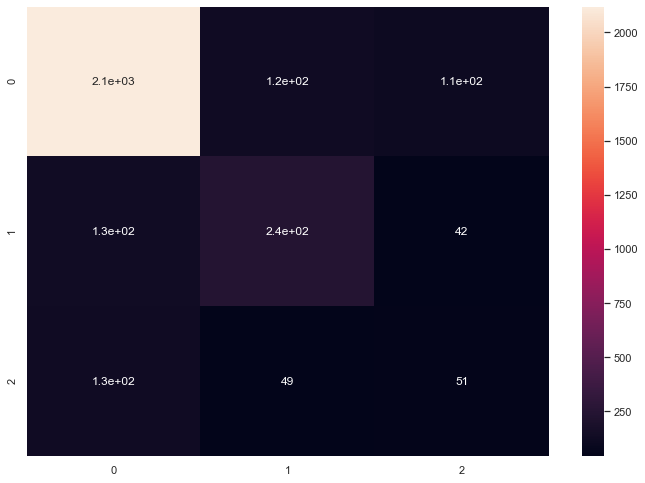

In [197]:
naive_bayes(x_vec,xtest_vec,y_train,y_test)

Random Forest Classifier :-
Training Score :  1.0
Testing Score :  0.812
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.8119999999999999


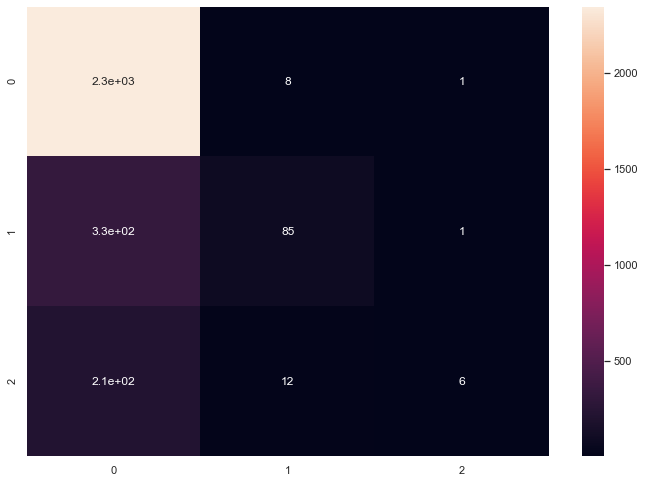

In [198]:
random_forest(x_vec,xtest_vec,y_train,y_test,100)

Support Vector Classifier :-
Using  linear
Training Score :  0.9905714285714285
Testing Score :  0.7853333333333333
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.7853333333333333

Support Vector Classifier :-
Using  poly
Training Score :  0.8605714285714285
Testing Score :  0.7706666666666667
AxesSubplot(0.125,0.125;0.496x0.755)
f1-Score :  0.7706666666666667

Support Vector Classifier :-
Using  rbf
Training Score :  0.8937142857142857
Testing Score :  0.8093333333333333
AxesSubplot(0.125,0.125;0.3968x0.755)
f1-Score :  0.8093333333333335



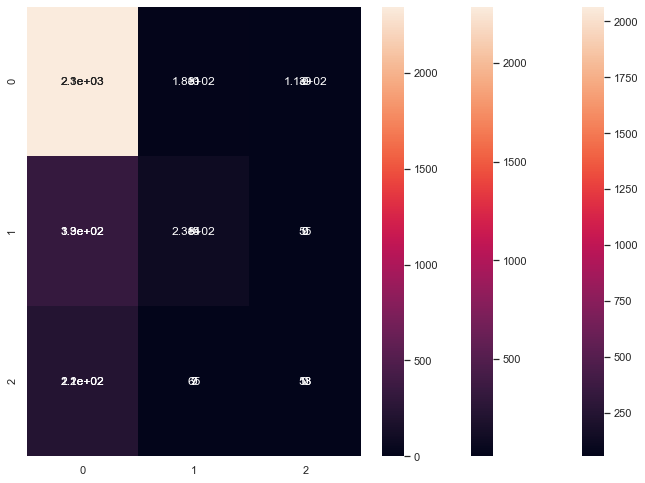

In [199]:
kernels=['linear','poly','rbf']
for k in kernels:
    support_vector_machine(x_vec,xtest_vec,y_train,y_test,k)

### TF IDF Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xtif_vec = tfidf.fit_transform(x_train).toarray()

In [32]:
print(xtif_vec.shape)
len(tfidf.vocabulary_)

(7000, 3141)


3141

In [202]:
xtif__test_vec = tfidf.transform(x_test).toarray()
print(xtif__test_vec.shape)

(3000, 3141)


Multinomial Naive Bayes :-
Training Score :  0.8022857142857143
Testing Score :  0.792
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.792


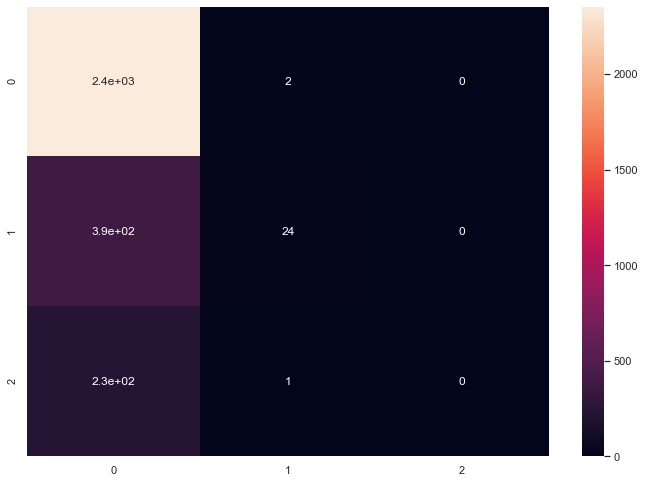

In [203]:
naive_bayes(xtif_vec,xtif__test_vec,y_train,y_test)

Random Forest Classifier :-
Training Score :  1.0
Testing Score :  0.8133333333333334
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.8133333333333334


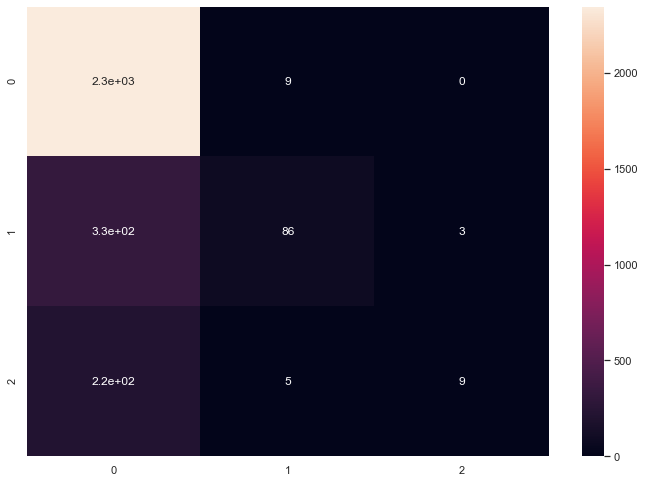

In [204]:
random_forest(xtif_vec,xtif__test_vec,y_train,y_test,100)

Support Vector Classifier :-
Using  linear
Training Score :  0.8887142857142857
Testing Score :  0.8336666666666667
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.8336666666666667

Support Vector Classifier :-
Using  poly
Training Score :  0.998
Testing Score :  0.7906666666666666
AxesSubplot(0.125,0.125;0.496x0.755)
f1-Score :  0.7906666666666666

Support Vector Classifier :-
Using  rbf
Training Score :  0.937
Testing Score :  0.82
AxesSubplot(0.125,0.125;0.3968x0.755)
f1-Score :  0.82



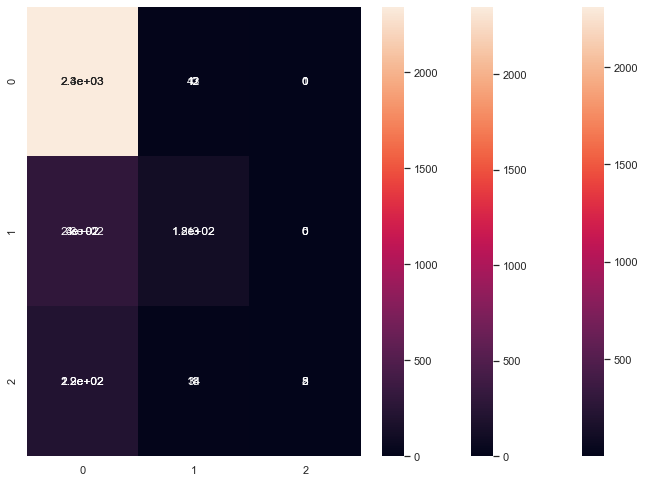

In [205]:
kernels=['linear','poly','rbf']
for k in kernels:
    support_vector_machine(xtif_vec,xtif__test_vec,y_train,y_test,k)

### TF IDF with n grams=2

In [206]:
tfidfn = TfidfVectorizer(ngram_range=(1,2))
xtifn_vec = tfidfn.fit_transform(x_train).toarray()
xtifn__test_vec = tfidfn.transform(x_test).toarray()

Multinomial Naive Bayes :-
Training Score :  0.7861428571428571
Testing Score :  0.7846666666666666
AxesSubplot(0.125,0.125;0.62x0.755)
f1-Score :  0.7846666666666666


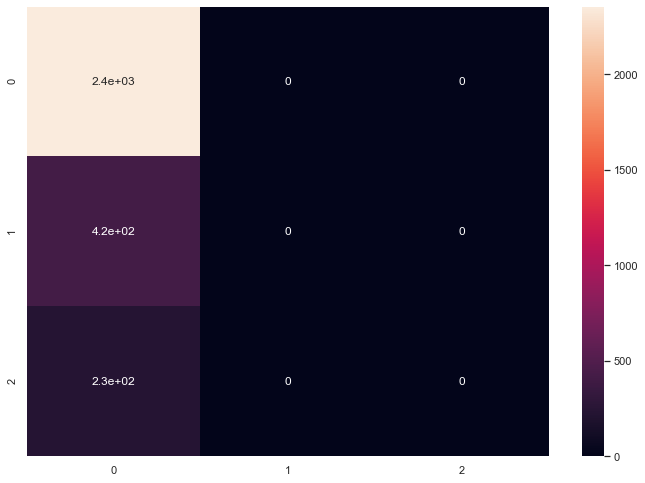

In [207]:
naive_bayes(xtifn_vec,xtifn__test_vec,y_train,y_test)

In [209]:
random_forest(xtifn_vec,xtifn__test_vec,y_train,y_test,100)

MemoryError: Unable to allocate 3.82 GiB for an array with shape (7000, 146603) and data type float32

In [210]:
kernels=['linear','poly','rbf']
for k in kernels:
    support_vector_machine(xtifn_vec,xtifn__test_vec,y_train,y_test,k)

MemoryError: Unable to allocate 7.65 GiB for an array with shape (7000, 146603) and data type float64

### Best Model - Support Vector Classifier with Linear Kernel on TF-IDF vectors
#### F1 Score on testing data - 81.33%

### Analysis

In [156]:
from wordcloud import WordCloud
def wc(data,bgcolor,title,s):
    print(s)
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [157]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [158]:
def bag_of_words(data):
    bag=[]
    for i in range(len(data)):
        temp=data[i].split()
        for j in range(len(temp)):
            bag.append(temp[j])
    return bag

In [159]:
from collections import Counter
def word_with_sentiment(data,s):
    bag=bag_of_words(data)
    counter=Counter(bag)
    most=counter.most_common(30)
    x, y= [], []
    for word,count in most[:40]:
        x.append(word)
        y.append(count)
    print(s)
    sns.barplot(x=y,y=x)

In [160]:
positve=[]
negative=[]
neutral=[]
for i in range(len(data)):
    if result[i]=='Negative':
        negative.append(data[i])
    elif result[i]=='Positive':
        positve.append(data[i])
    else:
        neutral.append(data[i])

Positive


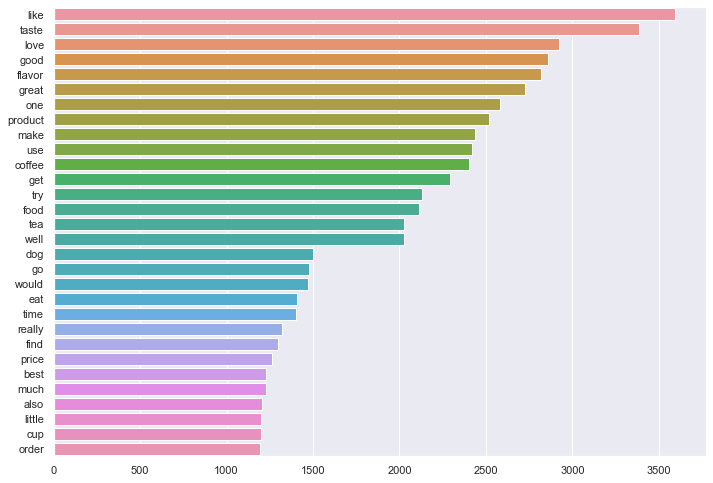

In [161]:
word_with_sentiment(positve,'Positive')

Neutral


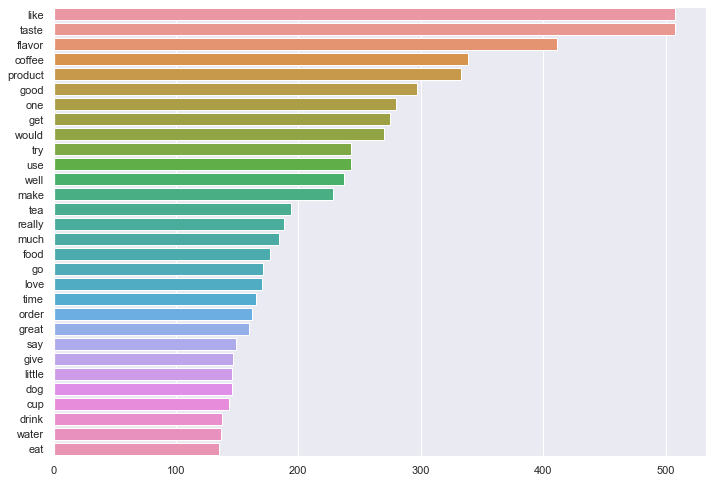

In [162]:
word_with_sentiment(neutral,'Neutral')

Negative


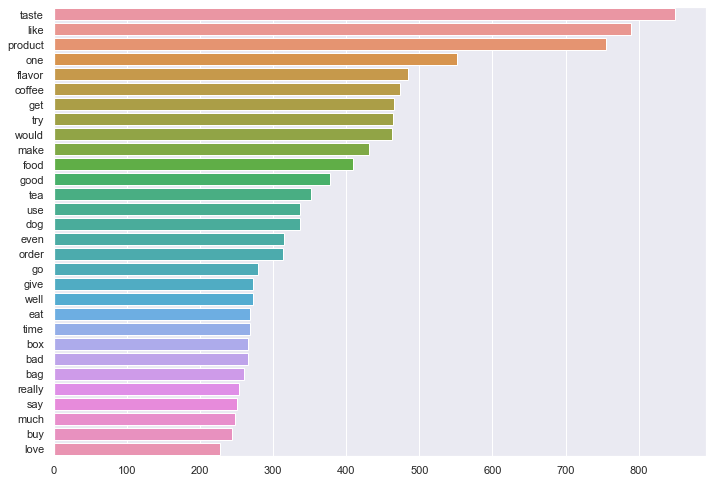

In [163]:
word_with_sentiment(negative,'Negative')

Positive


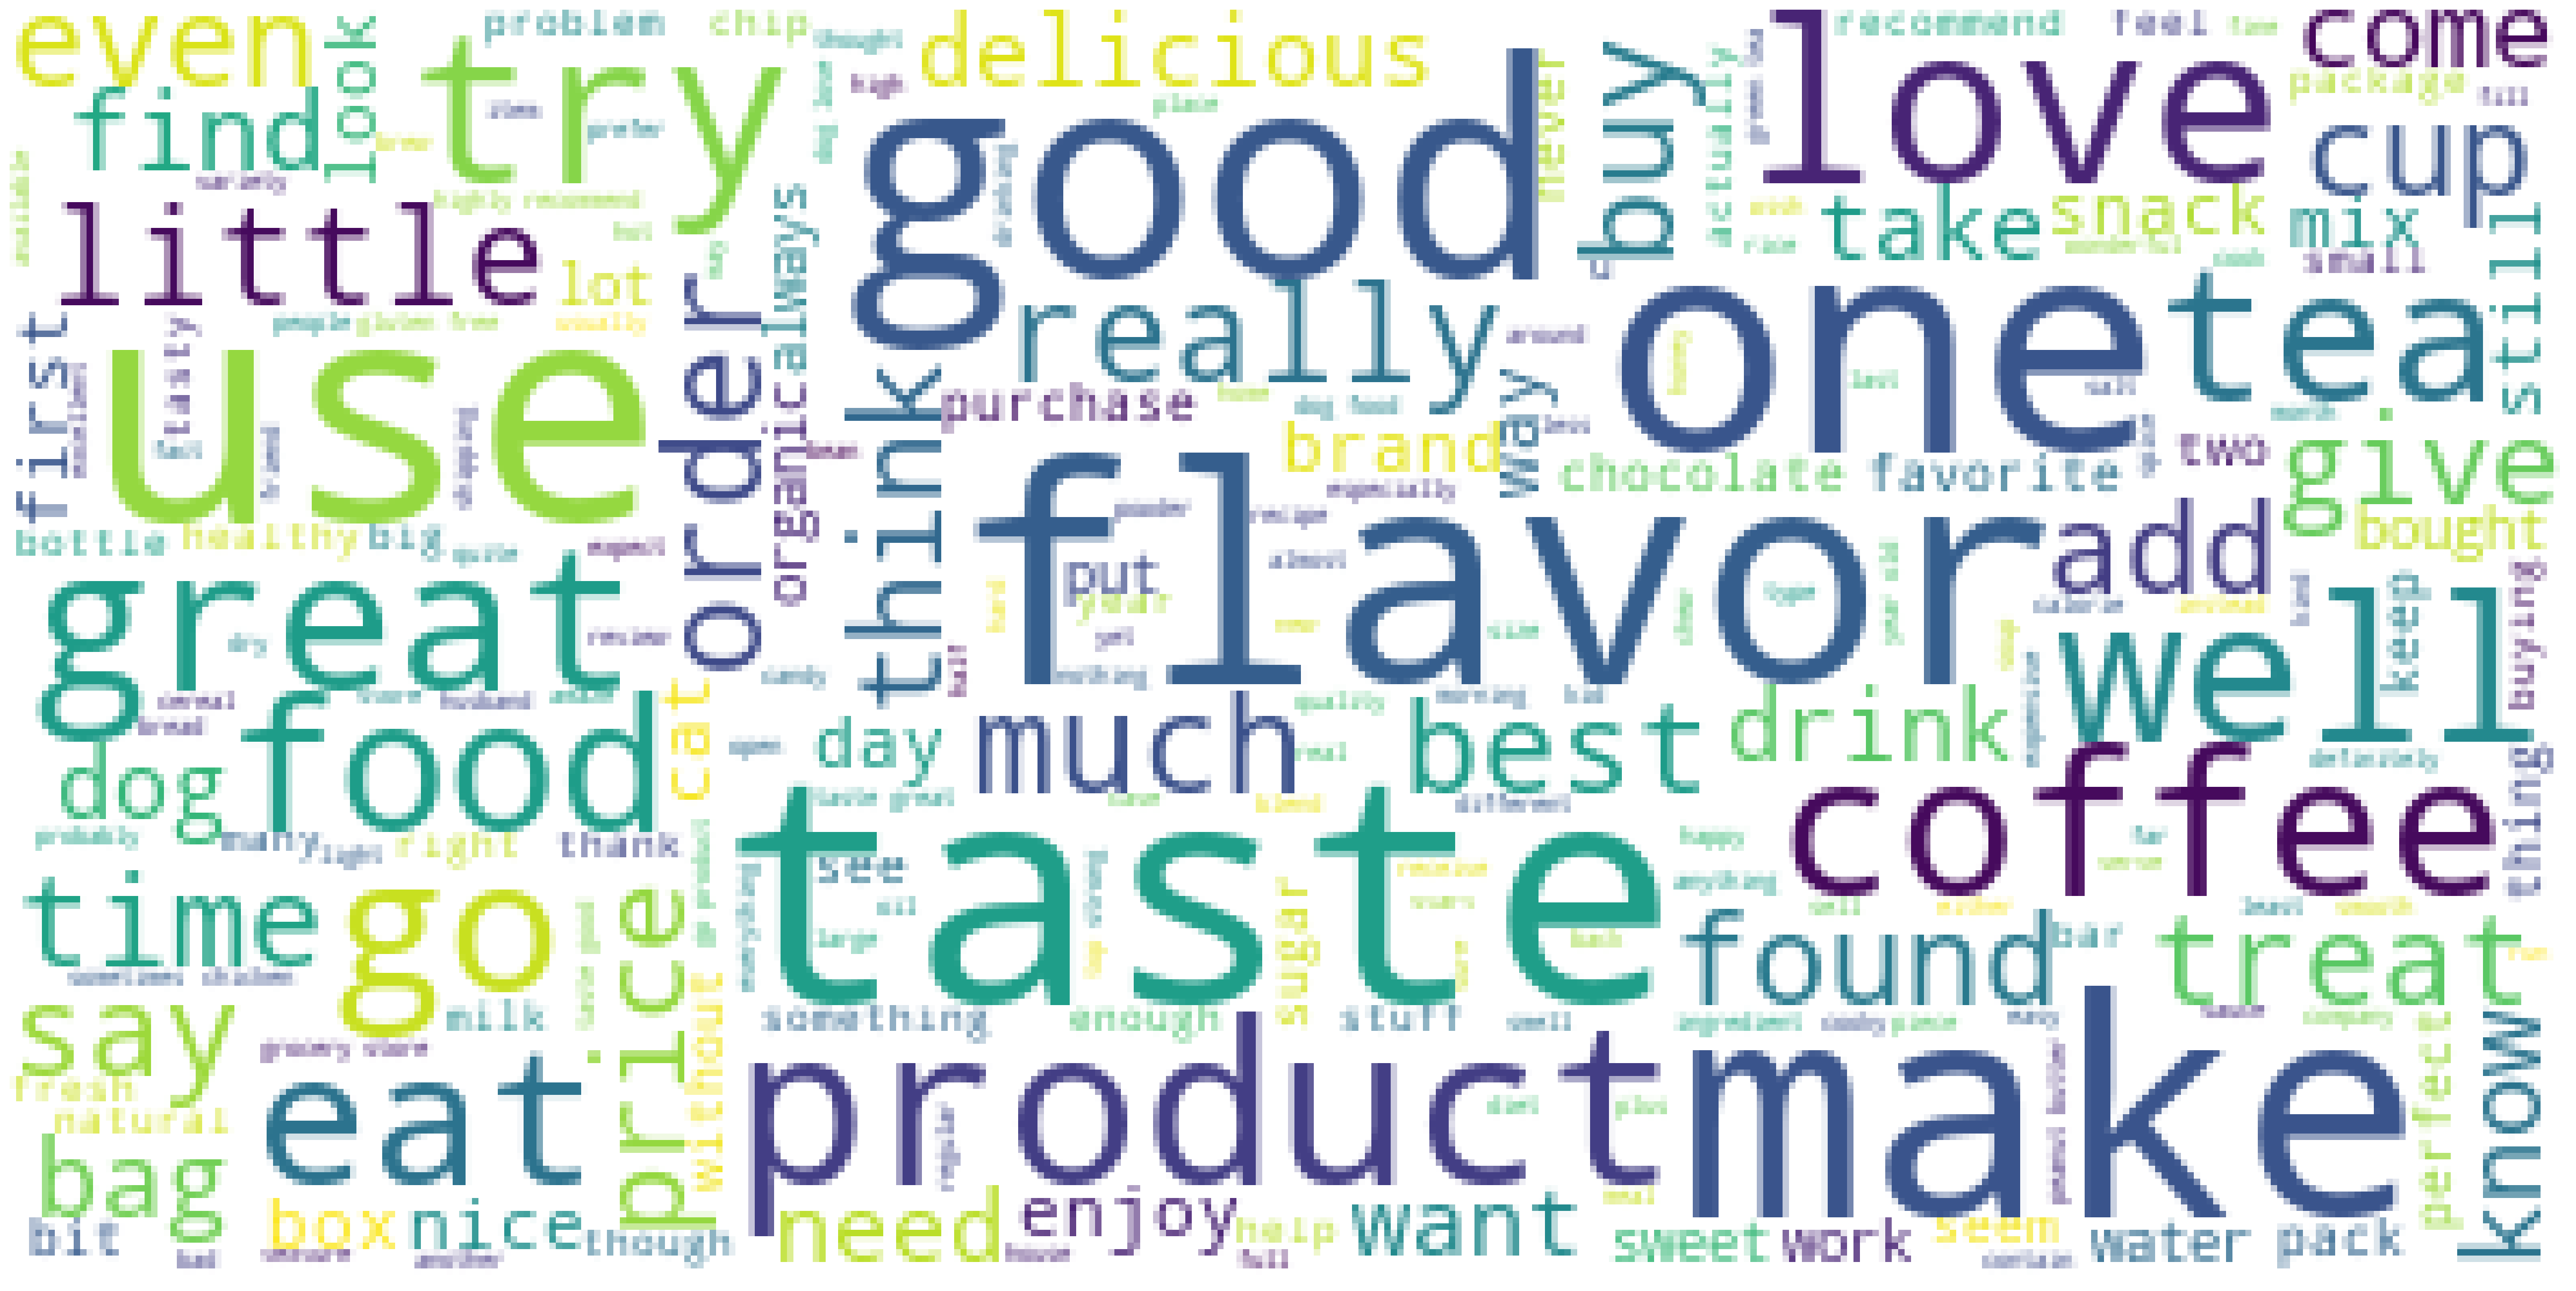

In [164]:
wc(positve,'white','Common Words','Positive')

Negative


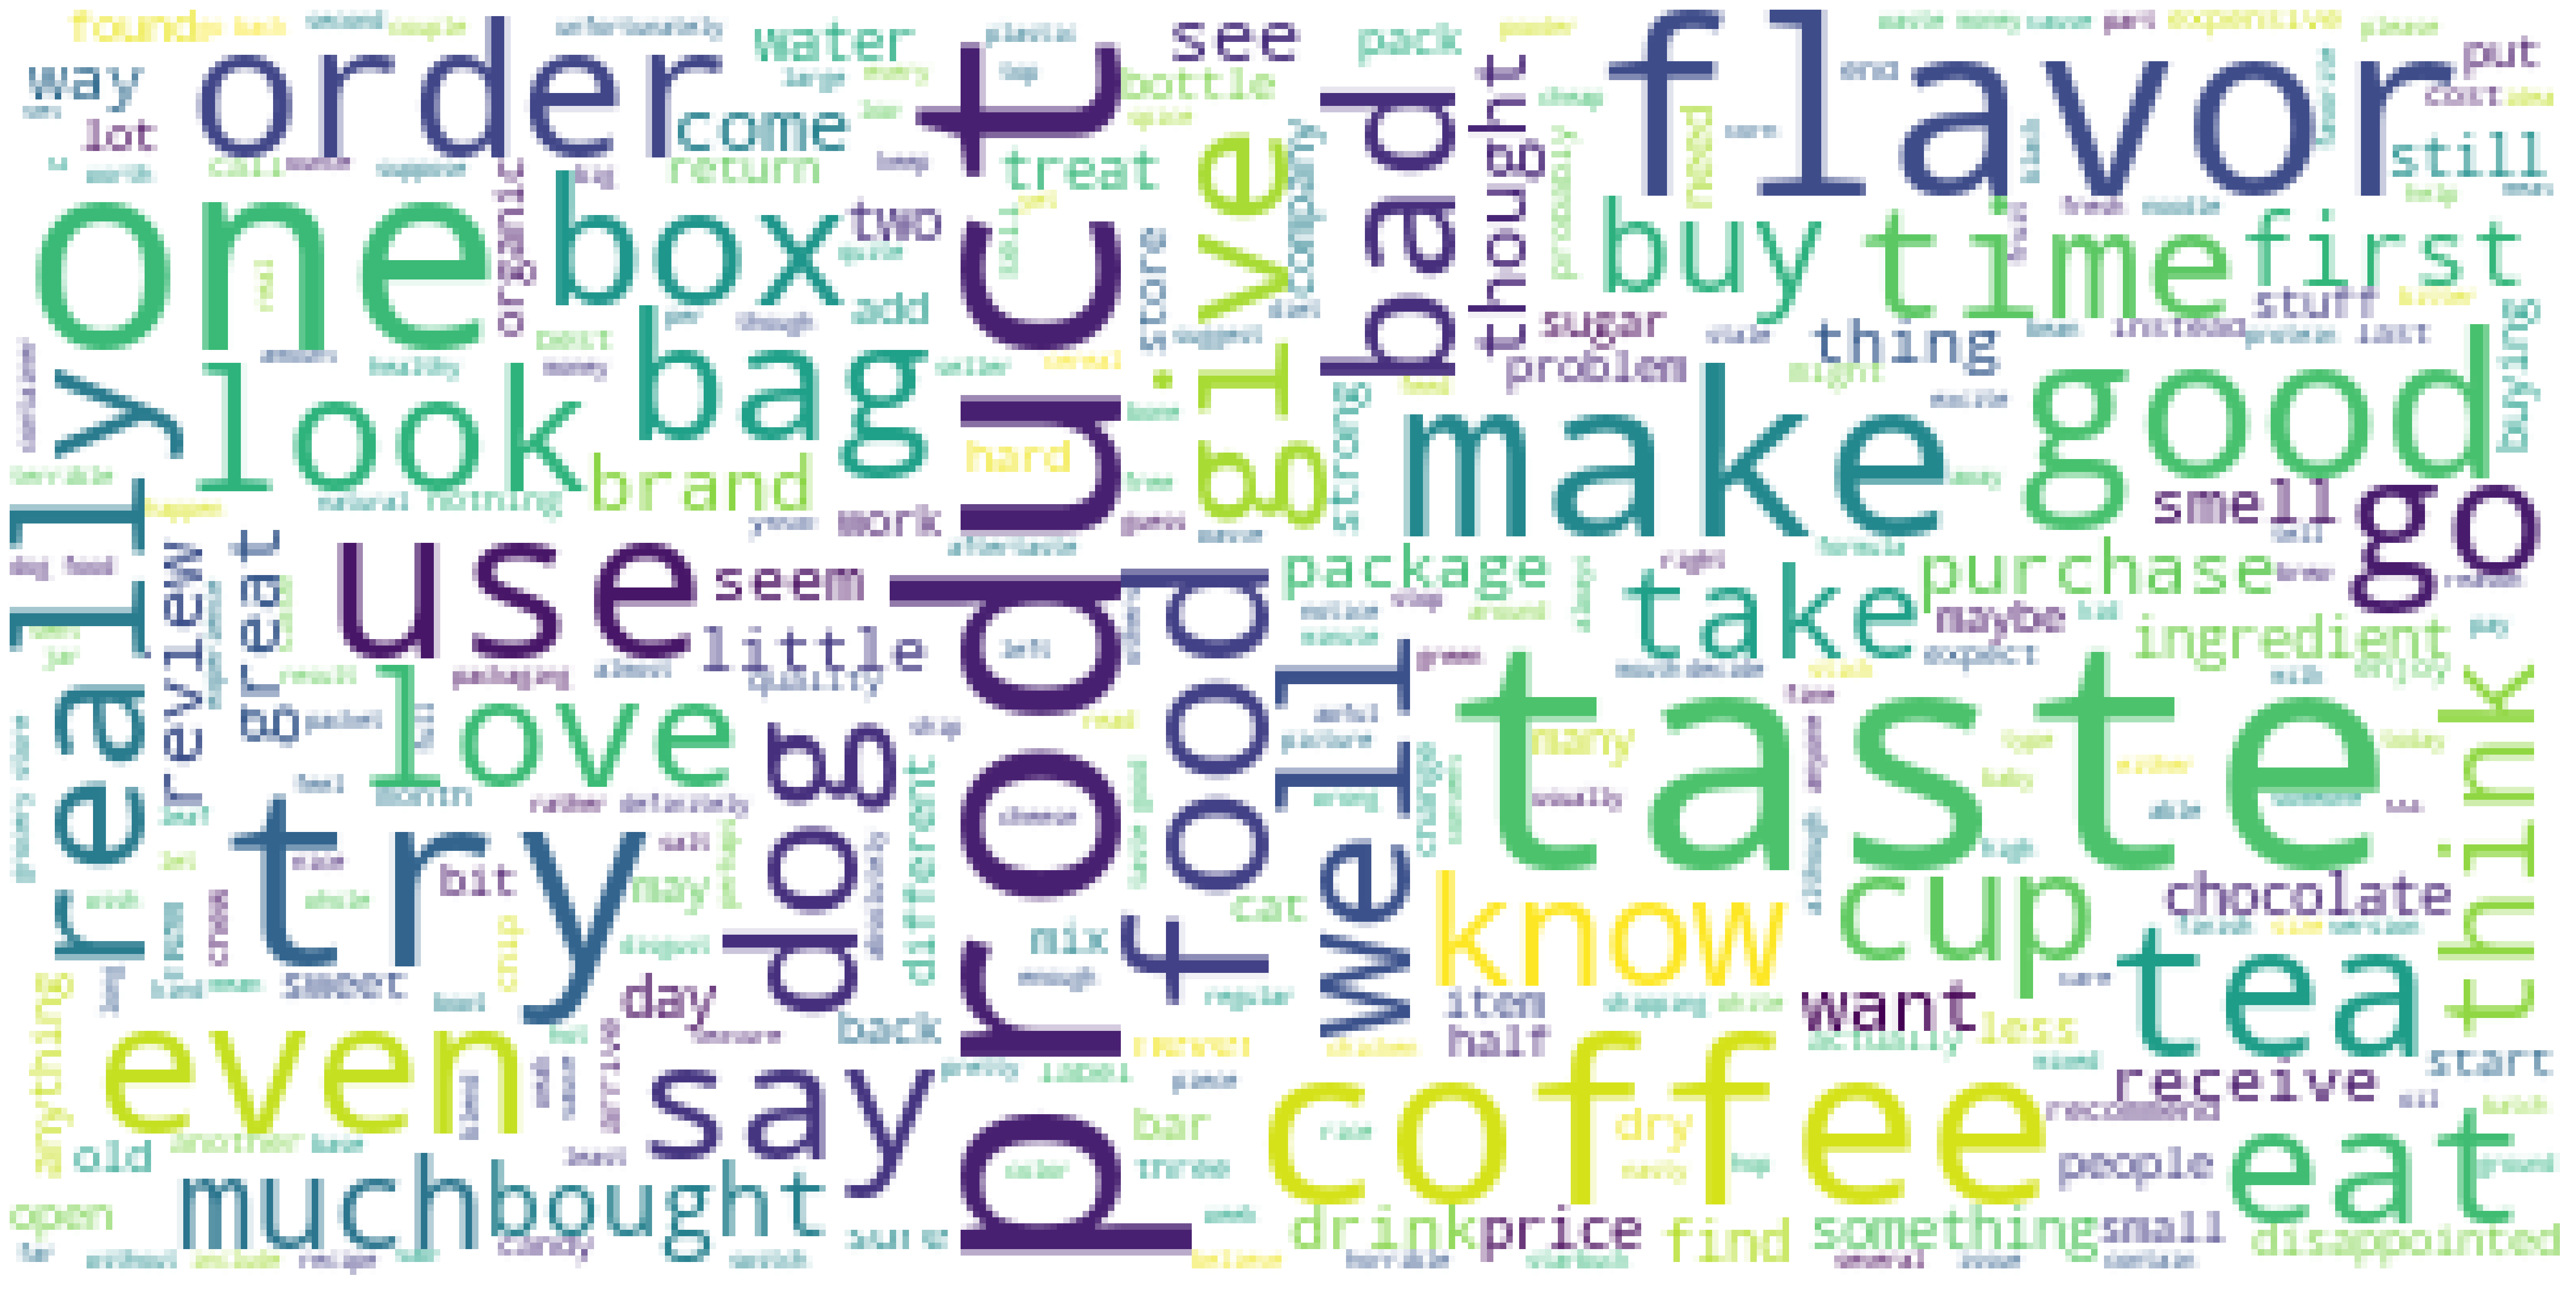

In [165]:
wc(negative,'white','Common Words','Negative')

Neutral


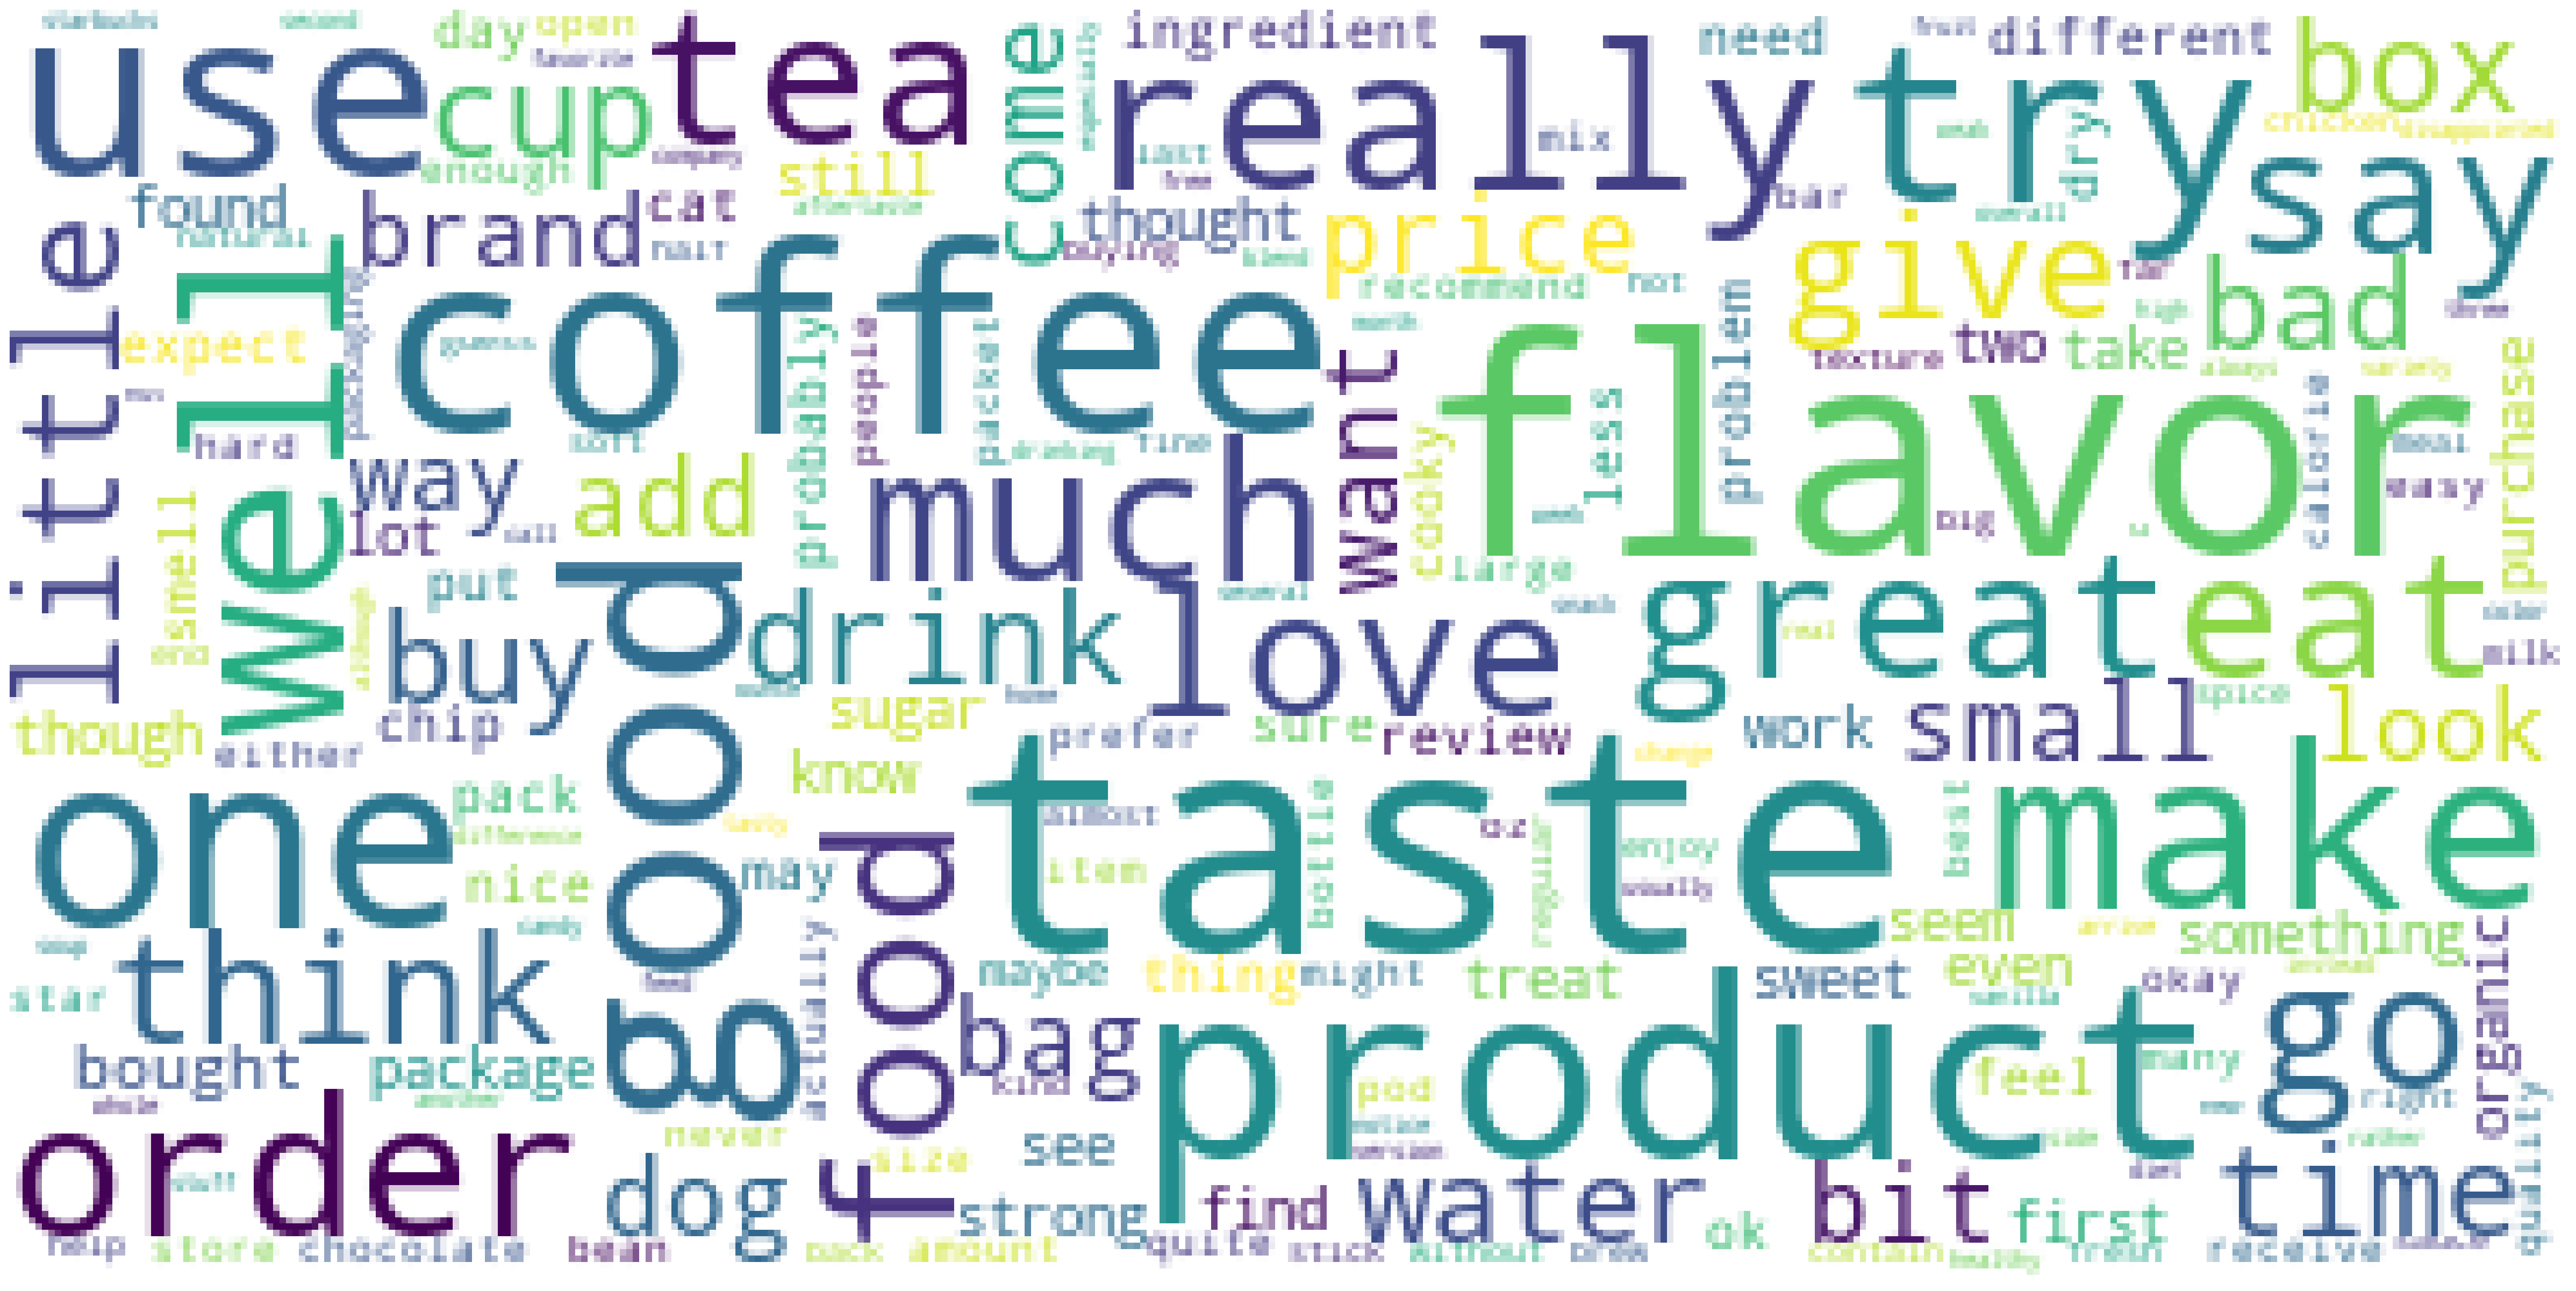

In [166]:
wc(neutral,'white','Common Words','Neutral')